# Task 3: Analysing green spaces in Berlin and Munich
**Task is to link census 2022 data for Berlin and for Munich with Green Space indicator from IOER-Monitor (1 km Raster)**
- Census 2022 datasets offers population sum and population difference sum (in comparison to 2011) aggregated on a 500 meter Raster grid (using centroids as points)
- IOER-Monitor offers indicators about Green Space, please use it for year 2022 with raster grid of 1.000 meter
- linking should be just a simple lookup

## Load functions from SoRa R package
This steps are currently required to load all R functions from /R/ directory. In future, the SoRa R package will be installed directly.

In [1]:
# load R functions from SoRa R Package
path <- "/home/jovyan/R/"
sora_functions  <- dir(path)
for (i in sora_functions) {
  source(paste0(path, i))
}

Load ggplot2 for plots and maps

In [3]:
# load ggplot2
library(ggplot2)

## Check your changed SORA_API_KEY 
- the environment variable from .Renviron file


In [4]:
#check environment variable for SORA_API_KEY
Sys.getenv("SORA_API_KEY")

[1] "9448b1d9c90db35d8975c24f71c60ee0c2855ee6eaf92eea2a32c23f094331d4de6579c54e51b223658f6769939e64d1380b30f9805bfc9316bef9a7a3ef6217"

## Load, explore and prepare input survey data

In [5]:
path_data <- "/home/jovyan/data/"

Load datasets and explore it. We start with Berlin.

**Do you know, what the five columns mean?**

In [6]:
## data Berlin
berlin <- read.csv(paste0(path_data, "census_2022_berlin.csv"))
head(berlin)

,id,pop_sum,pop_diff_sum,x,y
,<chr>,<int>,<int>,<int>,<int>
1,500mN32535E45690,155,44,4569250,3253750
2,500mN32535E45695,173,7,4569750,3253750
3,500mN32540E45685,222,45,4568750,3254250
4,500mN32540E45690,167,29,4569250,3254250
5,500mN32540E45695,137,11,4569750,3254250
6,500mN32545E45685,256,1,4568750,3254750


In [7]:
#show dimension of the data (number of rows and columns)
dim(berlin)

[1] 3824    5

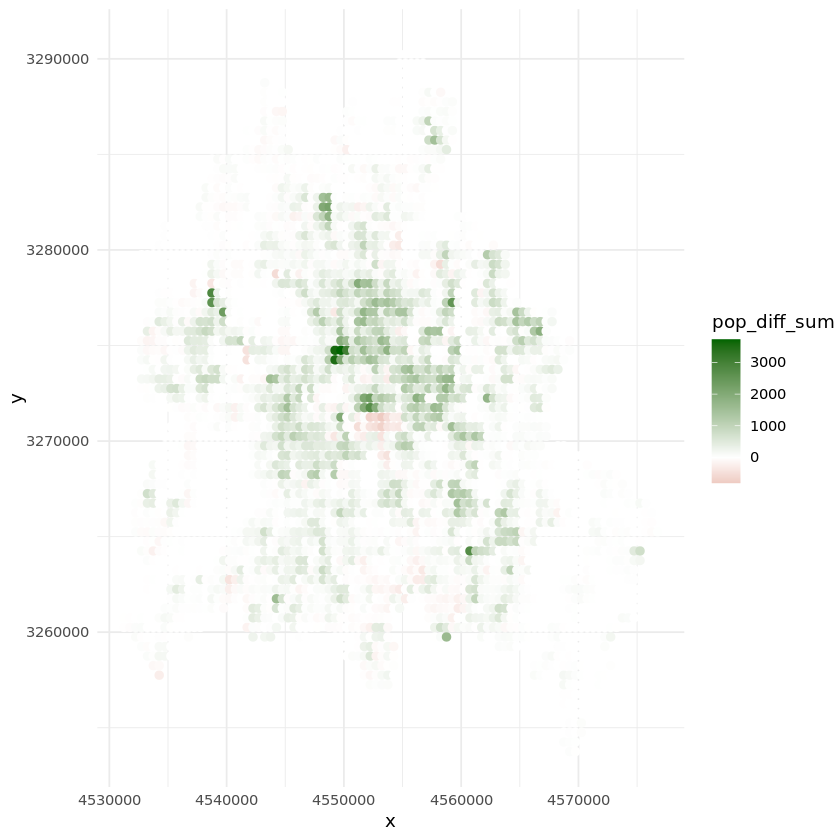

In [8]:
#draw map of Berlin with population difference sum (between year 2022 and 2011) for each 500m grid cell
ggplot(berlin, aes(x = x, y = y, color = pop_diff_sum)) +
  geom_point(size = 2) +
  scale_color_gradient2(low = "darkred", mid = "white", high = "darkgreen", midpoint = 0) +
  theme_minimal()

We can see, that number of population in Berlin has increased between 2011 and 2022 in many parts of the city.

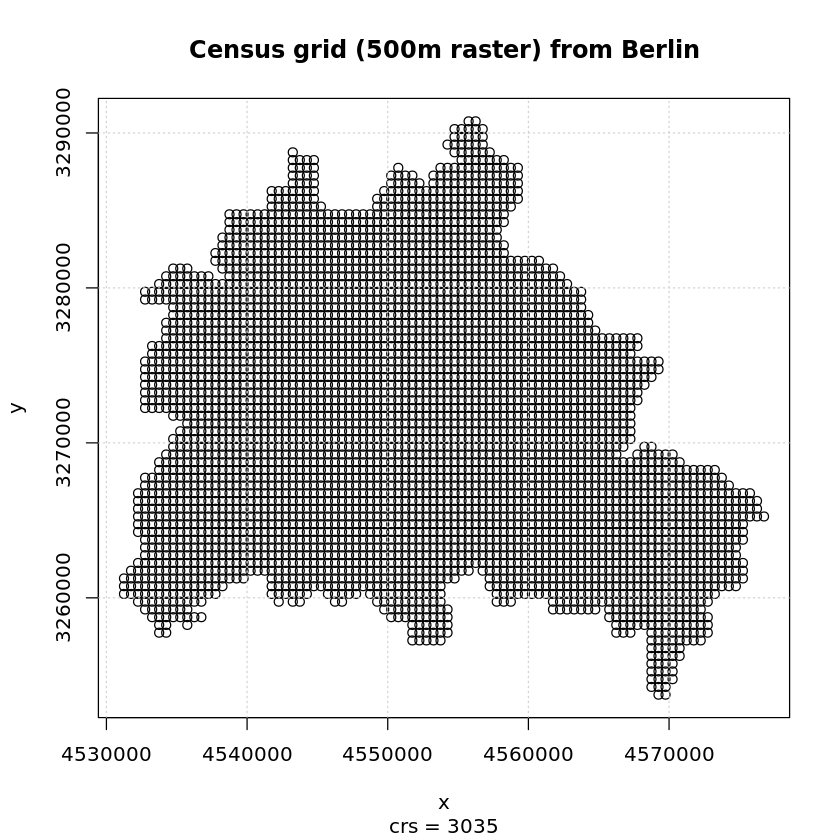

In [9]:
## plot Berlin
plot(berlin$x, berlin$y, 
     xlab = "x", ylab = "y",
     main = "Census grid (500m raster) from Berlin",
     sub = "crs = 3035")
grid()

And now load and explore the data for Munich.

In [10]:
## data Munich
munich <- read.csv(paste0(path_data, "census_2022_munich.csv"))
head(munich)

,id,pop_sum,pop_diff_sum,x,y
,<chr>,<int>,<int>,<int>,<int>
1,500mN27780E44295,37,-27,4429750,2778250
2,500mN27800E44240,688,22,4424250,2780250
3,500mN27800E44245,6,0,4424750,2780250
4,500mN27800E44250,0,0,4425250,2780250
5,500mN27800E44255,0,0,4425750,2780250
6,500mN27800E44260,0,0,4426250,2780250


In [11]:
#show dimension of the data (number of rows and columns)
dim(munich)

[1] 1377    5

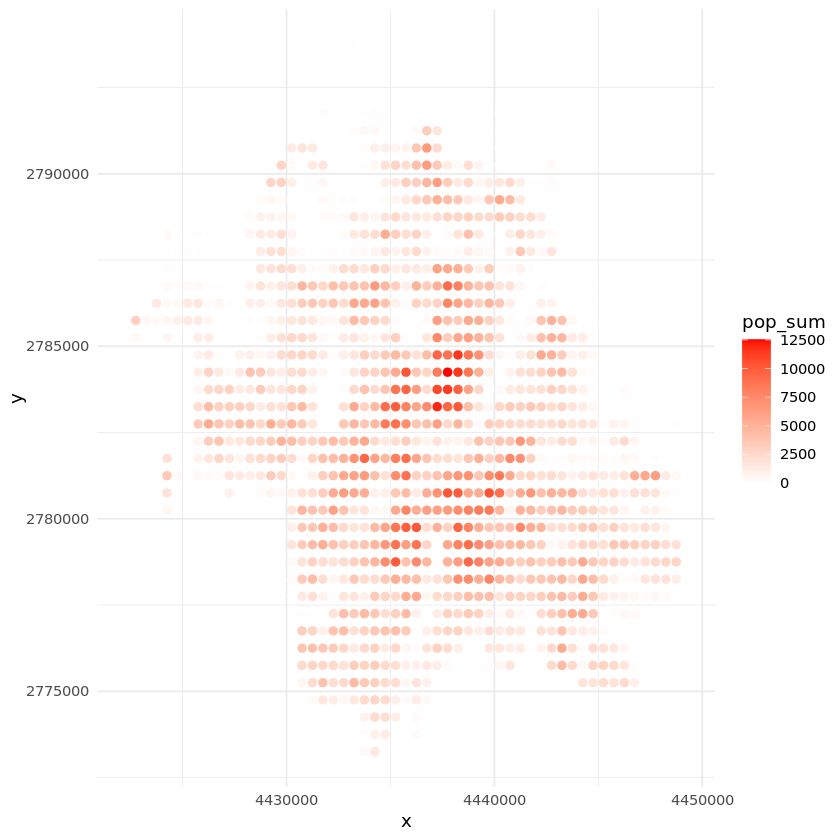

In [12]:
#draw map of Munich with population sum for each 500m grid cell
ggplot(munich, aes(x = x, y = y, color = pop_sum)) +
  geom_point(size = 2) +
  scale_color_gradient(low = "white", high = "red") +
  theme_minimal()

The center of Munich has a higher population density than the peripher parts.

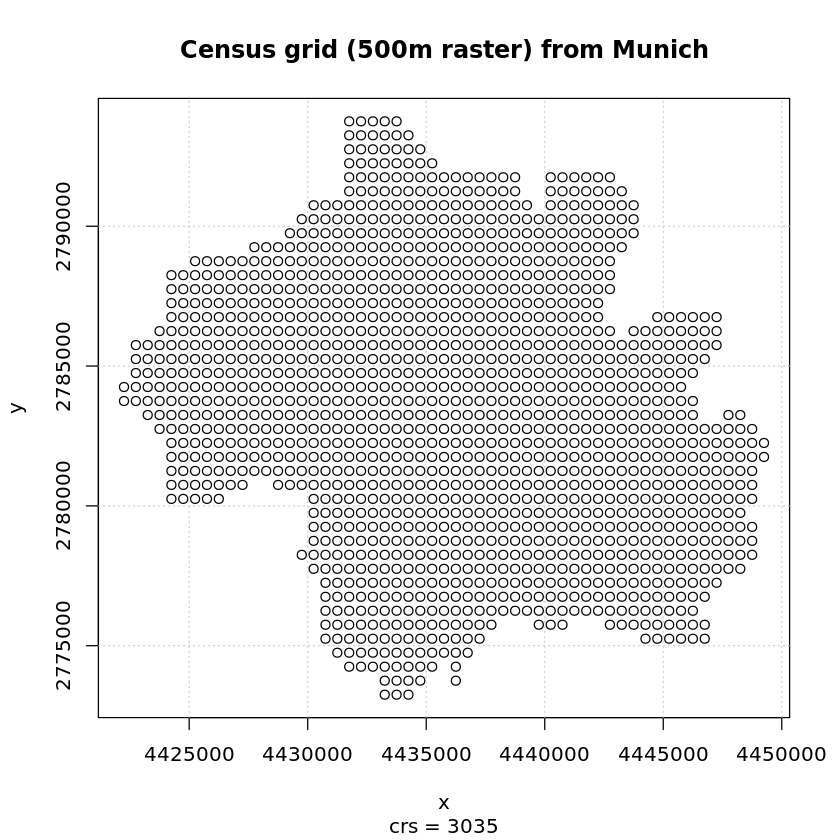

In [13]:
## plot Munich
plot(munich$x, munich$y, 
     xlab = "x", ylab = "y",
     main = "Census grid (500m raster) from Munich",
     sub = "crs = 3035")
grid()

The following function can be used in your scientific R script, to stop the execution if Geolinking Service SoRa is not available:

In [14]:
## check is sora available, stop if there is a problem
stopifnot(sora_available())

### Prepare and execute the linking jobs for Berlin and Munich
hint:
- this simple linking method only needs parameter "method", no more parameters.

In [15]:
## linking job berlin and munich

## reduce survey data to only id, x and y and add Coordinate Reference System (CRS) using sora_custom() function
sora_data_berlin <- sora_custom(.data = berlin, crs = 3035)

sora_data_munich <- sora_custom(.data = munich, crs = 3035)

## define spatial dataset
spat_data <- sora_spatial(id = "ioer-monitor-f01rg-2022-1000m")

In [16]:
# define linking
linking <- sora_linking(
  method = "lookup"
)

In [17]:
# start the linking request

job_id_berlin <- sora_request(dataset = sora_data_berlin, link_to = spat_data, method = linking)

→ The provided coordinates have unique identifiers and are in valid format.
→ The requested sora-provided geospatial dataset is existing.
→ Chosen geospatial dataset: Proportion of open space in reference area (2022,
  1000m Raster) from IOER-Monitor (IOER)
→ Chosen linkage: Lookup on raster with numeric field None - Geocoded Dataset:
  Vector: Point | Geospatial Dataset: Raster - numeric
→ The requested linkage is plausible and fits to the chosen geospatial dataset.
  All provided parameter are valid including its values.
→ All required permissions for accessing the data are available.
→ Total number of provided coordinates: 3824 (valid: 3824, having null values:
  0).
→ Number of coordinates located within the bounding box of geospatial dataset:
  3824 (outside: 0).
→ All required external services are available.


**Please wait some seconds ; )**

In [18]:
# start the linking request

job_id_munich <- sora_request(dataset = sora_data_munich, link_to = spat_data, method = linking)

→ The provided coordinates have unique identifiers and are in valid format.
→ The requested sora-provided geospatial dataset is existing.
→ Chosen geospatial dataset: Proportion of open space in reference area (2022,
  1000m Raster) from IOER-Monitor (IOER)
→ Chosen linkage: Lookup on raster with numeric field None - Geocoded Dataset:
  Vector: Point | Geospatial Dataset: Raster - numeric
→ The requested linkage is plausible and fits to the chosen geospatial dataset.
  All provided parameter are valid including its values.
→ All required permissions for accessing the data are available.
→ Total number of provided coordinates: 1377 (valid: 1377, having null values:
  0).
→ Number of coordinates located within the bounding box of geospatial dataset:
  1377 (outside: 0).
→ All required external services are available.


### Get results

First, try of the linking job is done. If TRUE, you can get the result data.

In [22]:
sora_job_done(job_id_berlin)

[1] TRUE

In [23]:
sora_job_done(job_id_munich)

[1] TRUE

In [24]:
## get results for Berlin

if (sora_job_done(job_id_berlin)){
  results_berlin <- sora_results(job_id = job_id_berlin)
  head(results_berlin)
}

→ The requested linkage was successfully executed.


id,value
<chr>,<chr>
500mN32535E45690,51.76757049560547
500mN32535E45695,51.76757049560547
500mN32540E45685,42.04886245727539
500mN32540E45690,77.83397674560547
500mN32540E45695,77.83397674560547
500mN32545E45685,42.04886245727539


In [25]:
## get results for Munich

if (sora_job_done(job_id_munich)){
  results_munich <- sora_results(job_id = job_id_munich)
  head(results_munich)
}

→ The requested linkage was successfully executed.


id,value
<chr>,<chr>
500mN27780E44295,33.92522048950195
500mN27800E44240,71.04239654541016
500mN27800E44245,71.04239654541016
500mN27800E44250,84.80081939697266
500mN27800E44255,84.80081939697266
500mN27800E44260,73.31046295166016


### Merge the datasets

Merge result data with origin census datasets (to include columns for population)

In [26]:
# merge Berlin data
linked_berlin <- merge(berlin, results_berlin, by="id")
head(linked_berlin)

,id,pop_sum,pop_diff_sum,x,y,value
,<chr>,<int>,<int>,<int>,<int>,<chr>
1,500mN32535E45690,155,44,4569250,3253750,51.76757049560547
2,500mN32535E45695,173,7,4569750,3253750,51.76757049560547
3,500mN32540E45685,222,45,4568750,3254250,42.04886245727539
4,500mN32540E45690,167,29,4569250,3254250,77.83397674560547
5,500mN32540E45695,137,11,4569750,3254250,77.83397674560547
6,500mN32545E45685,256,1,4568750,3254750,42.04886245727539


In [27]:
# merge Munich data
linked_munich <- merge(munich, results_munich, by="id")
head(linked_munich)

,id,pop_sum,pop_diff_sum,x,y,value
,<chr>,<int>,<int>,<int>,<int>,<chr>
1,500mN27730E44330,0,0,4433250,2773250,77.71388244628906
2,500mN27730E44335,357,-74,4433750,2773250,77.71388244628906
3,500mN27730E44340,1546,-138,4434250,2773250,19.114078521728516
4,500mN27735E44330,12,-18,4433250,2773750,77.71388244628906
5,500mN27735E44335,142,-60,4433750,2773750,77.71388244628906
6,500mN27735E44340,990,-58,4434250,2773750,19.114078521728516


Plot the result

### Plots of Berlin

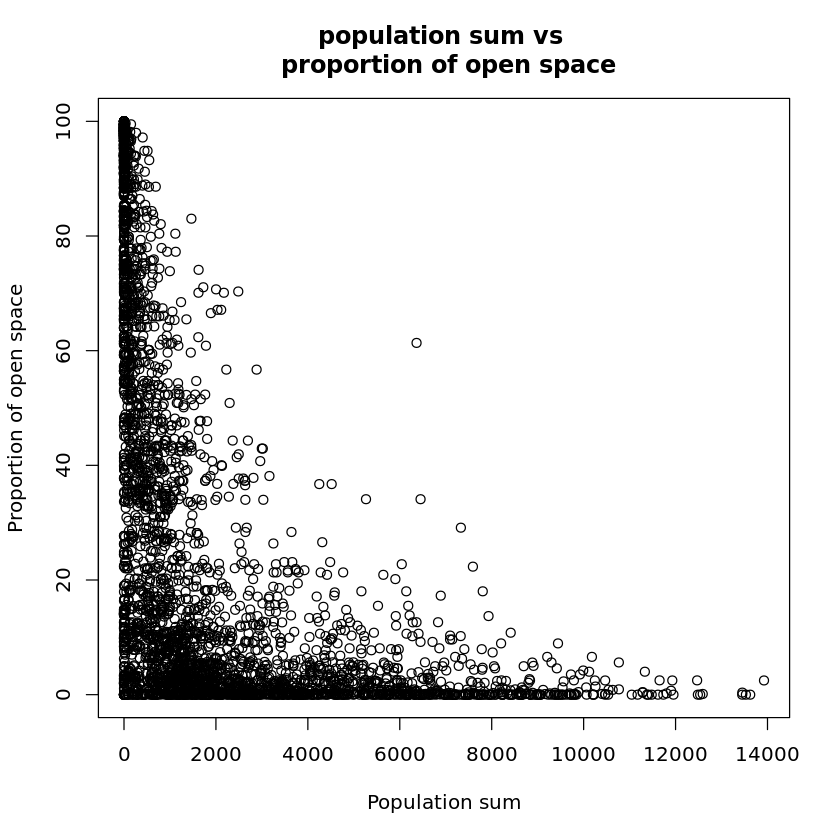

In [28]:
# plot Population Sum of census 2022
plot(linked_berlin$pop_sum, linked_berlin$value, type = "p", main = "population sum vs \n proportion of open space", xlab = "Population sum", ylab = "Proportion of open space")

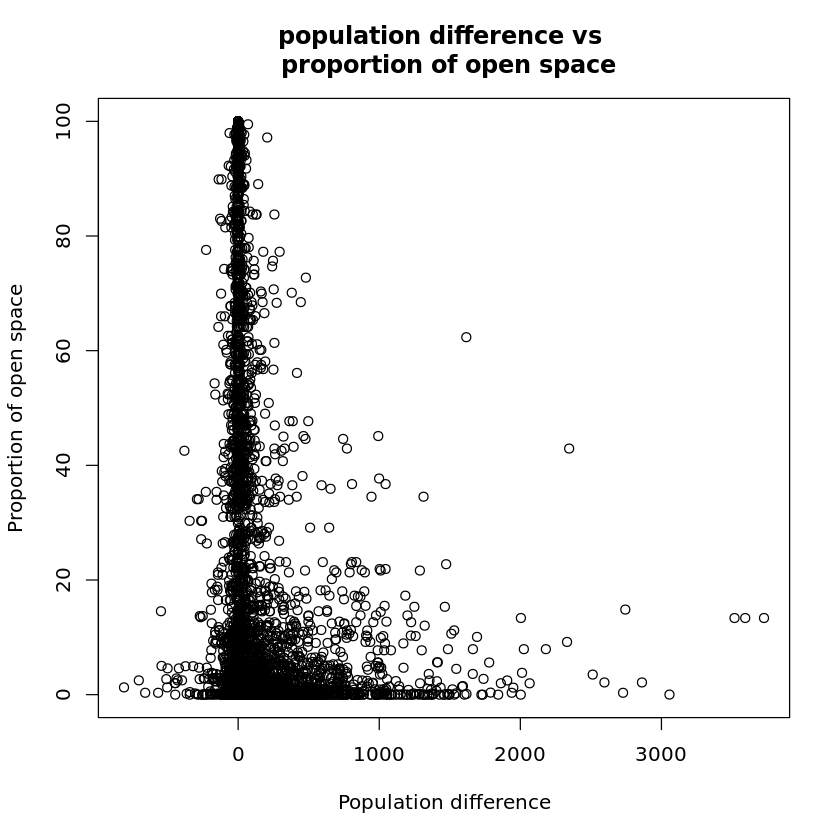

In [29]:
plot(linked_berlin$pop_diff_sum, linked_berlin$value, type = "p", main = "population difference vs \n proportion of open space", xlab = "Population difference", ylab = "Proportion of open space")

### Plots of Munich

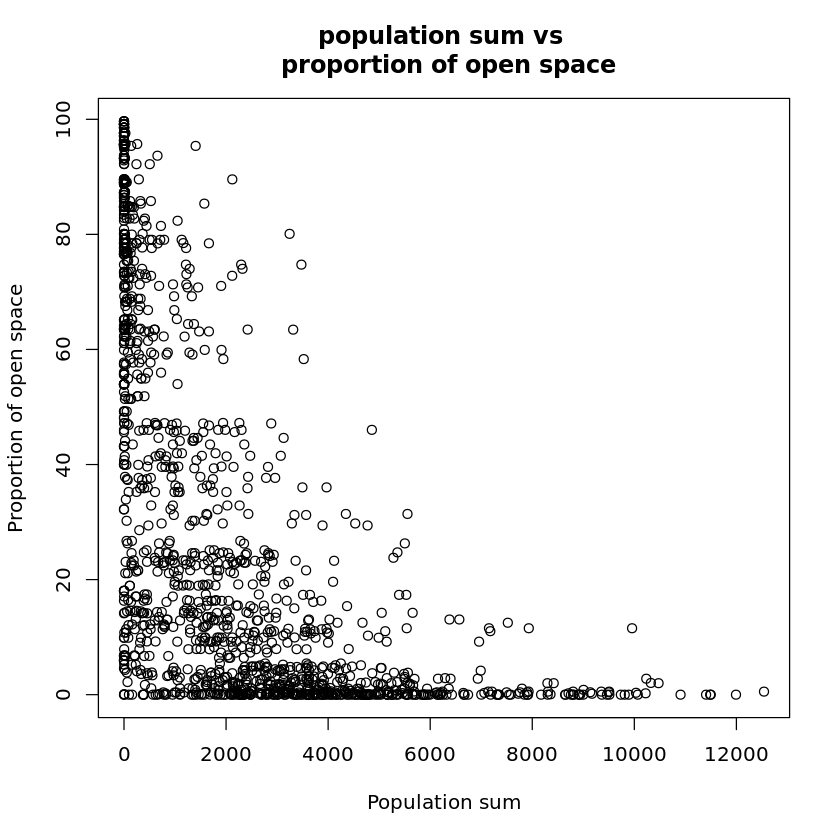

In [30]:
plot(linked_munich$pop_sum, linked_munich$value, type = "p", main = "population sum vs \n proportion of open space", xlab = "Population sum", ylab = "Proportion of open space")

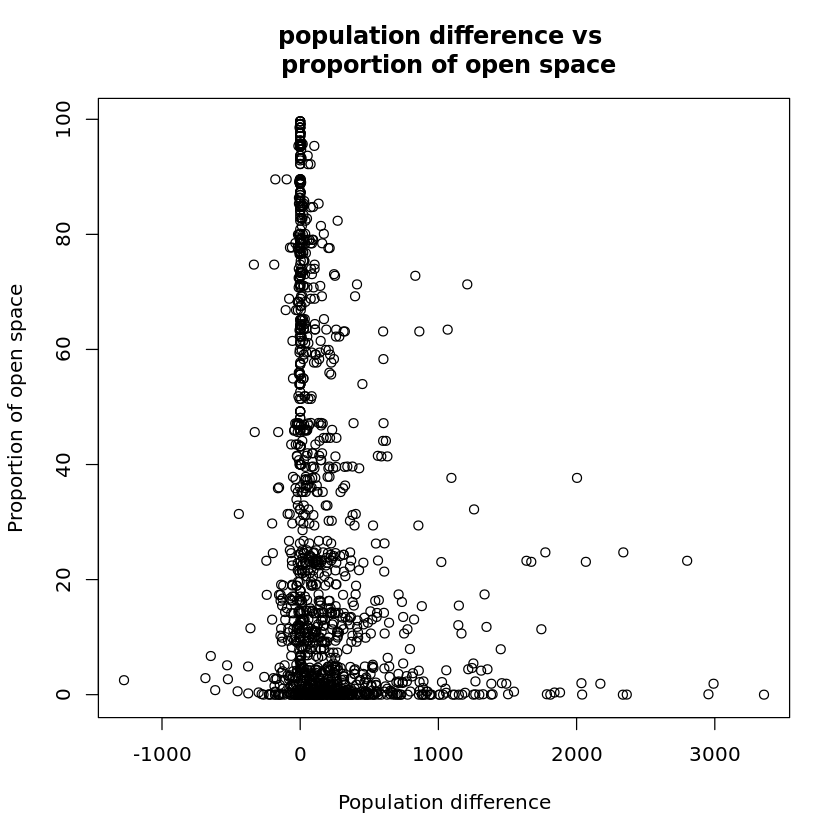

In [31]:
plot(linked_munich$pop_diff_sum, linked_munich$value, type = "p", main = "population difference vs \n proportion of open space", xlab = "Population difference", ylab = "Proportion of open space")